In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
##make synthetic data points
from sklearn.datasets import make_classification


In [43]:
X,y=make_classification(n_samples=1000,n_features=2,
                        n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [44]:
X

array([[-0.9277712 , -0.59290447],
       [ 0.24898194,  1.12418399],
       [ 1.1202265 ,  1.6022257 ],
       ...,
       [ 1.73331087,  0.25194181],
       [ 0.24667208,  0.54962757],
       [ 1.75580559,  1.06011385]])

In [45]:
pd.DataFrame(X)[0]

0     -0.927771
1      0.248982
2      1.120226
3     -0.690128
4     -0.008193
         ...   
995    3.020305
996    0.922923
997    1.733311
998    0.246672
999    1.755806
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

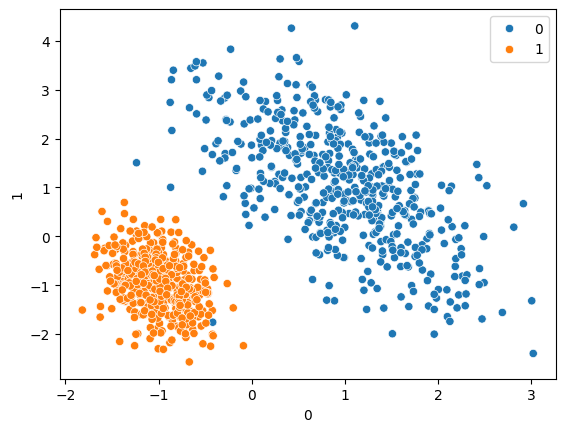

In [46]:
#scatter-plot
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [50]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [51]:
y_pred=svc.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.99      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[128   1]
 [  0 121]]


In [58]:
## another dataset
X,y=make_classification(n_samples=1000,n_features=2,
                        n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

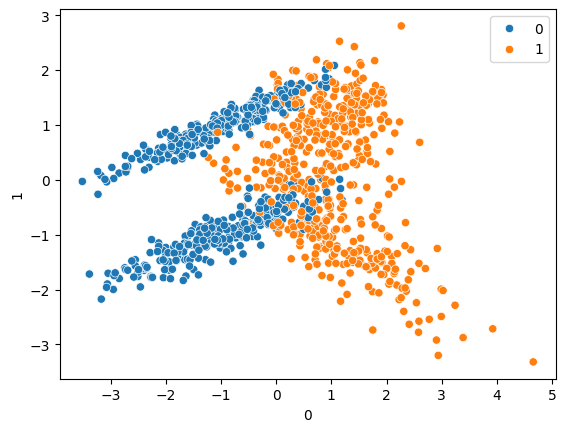

In [59]:
#scatter-plot
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [64]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
from sklearn.svm import SVC
rbf=SVC(kernel='rbf')

In [66]:
rbf.fit(X_train1,y_train1)

SVC()

In [67]:
y_pred1=rbf.predict(X_test1)

In [70]:
#linear kernel
svc.fit(X_train1,y_train1)
y_pred0=svc.predict(X_test1)
print(classification_report(y_test1,y_pred0))
print(confusion_matrix(y_test1,y_pred0))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       120
           1       0.90      0.85      0.88       130

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[108  12]
 [ 19 111]]


In [69]:
##rbf kernel
print(classification_report(y_test1,y_pred1))
print(confusion_matrix(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.94      0.92      0.93       130

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[112   8]
 [ 10 120]]


In [71]:
##polynomial kernel
pol=SVC(kernel='poly')
pol.fit(X_train1,y_train1)
y_pred2=pol.predict(X_test1)
print(classification_report(y_test1,y_pred2))
print(confusion_matrix(y_test1,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       120
           1       0.86      0.95      0.90       130

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250

[[100  20]
 [  7 123]]


In [72]:
## sigmoid kernel
sig=SVC(kernel='sigmoid')
sig.fit(X_train1,y_train1)
y_pred3=sig.predict(X_test1)
print(classification_report(y_test1,y_pred3))
print(confusion_matrix(y_test1,y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       120
           1       0.84      0.82      0.83       130

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[100  20]
 [ 24 106]]


In [73]:
## hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],
           'gamma':[1,0.1,0.01,0.001,0.0001],
           'kernel':['rbf']}

In [74]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [75]:
grid.fit(X_train1,y_train1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [76]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [77]:
y_pred4=grid.predict(X_test1)
print(classification_report(y_test1,y_pred4))
print(confusion_matrix(y_test1,y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       120
           1       0.96      0.95      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[115   5]
 [  7 123]]
